# Markov Matrices - Business Cycle
Project 1 - Linear Algebra (Spring 1403) - Dr. Sarafraz

ECE - University of Tehran

Designed by:
[Erfan Asgari](https://github.com/erfanasgari21),
[Fardin Abbasi](https://github.com/fardinabbasi)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## II) Numerical Methods

### Q6

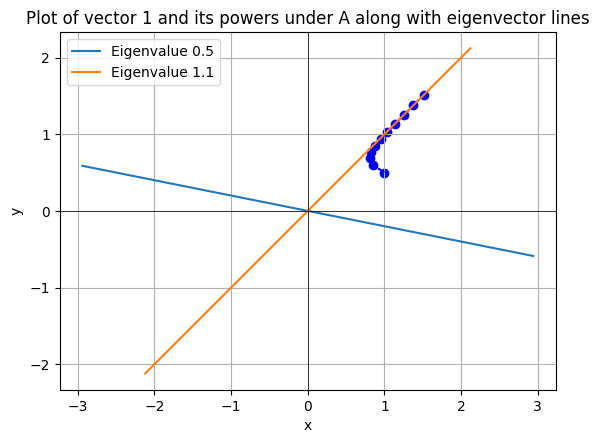

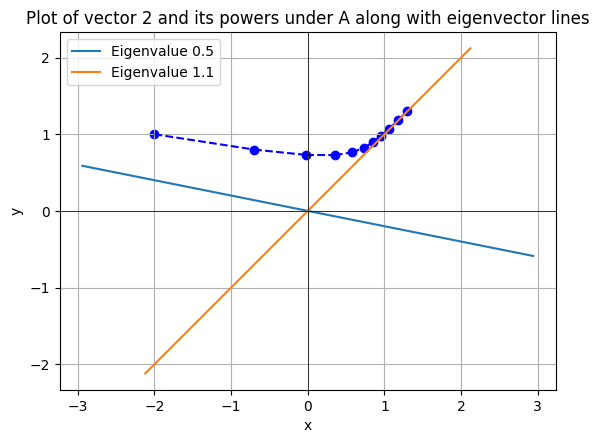

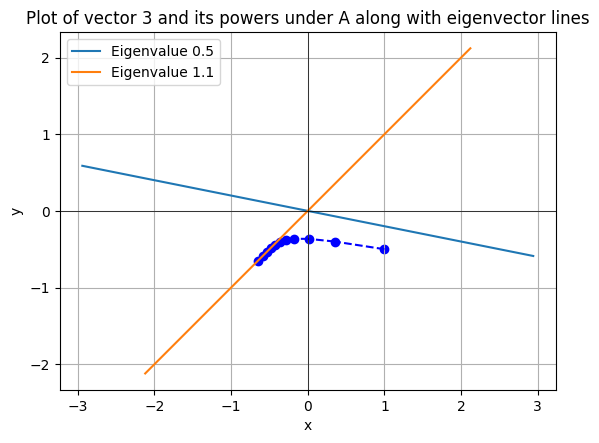

In [2]:
A = np.array([[0.6, 0.5],
              [0.1, 1]])
eigenvalues, eigenvectors = np.linalg.eig(A)
v_list = [np.array([1, 0.5]), np.array([-2, 1]), np.array([1, -0.5])]

for v_index, v in enumerate(v_list):
    plt.figure()
    powers = [v]
    for i in range(1, 11):
        powers.append(np.dot(np.linalg.matrix_power(A, i), v))

    for i in range(len(powers)):
        plt.scatter(powers[i][0], powers[i][1], color='blue')
        if i < len(powers) - 1:
            plt.plot([powers[i][0], powers[i + 1][0]], [powers[i][1], powers[i + 1][1]], color='blue', linestyle='--')

    # Plot eigenvector lines
    for i in range(len(eigenvalues)):
        eigenvec = eigenvectors[:, i]
        eigenvec_x, eigenvec_y = eigenvec[0], eigenvec[1]
        scale = 3
        plt.plot([eigenvec_x * -scale, eigenvec_x * scale], [eigenvec_y * -scale, eigenvec_y * scale], color=f'C{i}', label=f'Eigenvalue {eigenvalues[i]}')

    # Set plot properties
    plt.title(f'Plot of vector {v_index+1} and its powers under A along with eigenvector lines')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True)
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend()
    plt.show()

### Q8

In [3]:
def power_iteration(A, num_iterations=100):
    n = A.shape[0]
    v = np.random.rand(n)

    for _ in range(num_iterations):
        # Calculate Av
        Av = np.dot(A, v)

        # Normalize Av
        v = Av / np.linalg.norm(Av)

    # Calculate the eigenvalue
    eigenvalue = np.dot(np.dot(v, A), v) / np.dot(v, v)

    return eigenvalue, v

eigenvalue, eigenvector = power_iteration(A, 1000)

print("Eigenvalue:", eigenvalue)
print("Eigenvector:", eigenvector)

Eigenvalue: 1.0999999999999999
Eigenvector: [0.70710678 0.70710678]


### Q10

In [4]:
def inverse_iteration(A, num_iterations=100, shift=0):
    n = A.shape[0]

    v = np.random.rand(n)

    for _ in range(num_iterations):
        # Solve (A - sigma*I)x = v
        x = np.linalg.solve(A - shift * np.eye(n), v)

        # Normalize x
        v = x / np.linalg.norm(x)

    # Calculate the eigenvalue
    eigenvalue = np.dot(np.dot(v, A), v) / np.dot(v, v)

    return eigenvalue, v

eigenvalue, eigenvector = inverse_iteration(A, 1000, 0)

print("Eigenvalue:", eigenvalue)
print("Eigenvector:", eigenvector)


Eigenvalue: 0.4999999999999999
Eigenvector: [-0.98058068  0.19611614]


## III) Business Cycle Analysis

Transition Matrix from the graph:

In [5]:
transition_matrix = np.array([[0.492, 0.077, 0],
                              [0.508, 0.778, 0.971],
                              [0, 0.145, 0.029]])

Eigen Pairs:

In [6]:
eigenvalues, eigenvectors = np.linalg.eig(transition_matrix)

print("Eigenvalues:")
print(eigenvalues)

print("\nEigenvectors:")
print(eigenvectors )

Eigenvalues:
[ 1.          0.43525383 -0.13625383]

Eigenvectors:
[[-0.14825585  0.78754729  0.09173738]
 [-0.9781035  -0.58039343 -0.74849817]
 [-0.14606077 -0.20715386  0.65676079]]


### Q15

In [7]:

initial_distribution = np.array([0.2, 0.5, 0.3])

def monte_carlo_markov_chain(transition_matrix, initial_distribution, num_steps, num_simulations):
    num_states = len(initial_distribution)
    state_counts = np.zeros(num_states)

    for _ in range(num_simulations):
        current_state = np.random.choice(range(num_states), p=initial_distribution)
        for _ in range(num_steps):
            current_state = np.random.choice(range(num_states), p=transition_matrix[:,current_state])
        state_counts[current_state] += 1

    state_probabilities = state_counts / (num_simulations)

    return state_probabilities


num_steps_list = [6, 12, 72, 120]
num_simulations = 1000

# Perform Monte Carlo estimation
state_probabilites_list = []
for num_steps in num_steps_list:
  state_probabilities = monte_carlo_markov_chain(transition_matrix, initial_distribution, num_steps, num_simulations)
  state_probabilites_list.append(state_probabilities)
  print(f"State Steady State after {num_steps} months:", state_probabilities)




State Steady State after 6 months: [0.107 0.773 0.12 ]
State Steady State after 12 months: [0.095 0.794 0.111]
State Steady State after 72 months: [0.105 0.763 0.132]
State Steady State after 120 months: [0.126 0.765 0.109]


### Q16

In [8]:
A = transition_matrix

initial_distributions = [np.array([0.1, 0.8, 0.1]),
                         np.array([0.6, 0.3, 0.1]),
                         np.array([0.1, 0.15, 0.75])]

n_iterations = 120

A_np_values = []

for initial_dist in initial_distributions:
    A_np = [initial_dist]

    for n in range(1, n_iterations):
        A_np.append(np.linalg.matrix_power(A, n).dot(initial_dist))

    A_np_values.append(A_np)


A_np_values = np.array(A_np_values)

A_np_values

array([[[0.1       , 0.8       , 0.1       ],
        [0.1108    , 0.7703    , 0.1189    ],
        [0.1138267 , 0.7710317 , 0.1151416 ],
        ...,
        [0.11651486, 0.76869541, 0.11478974],
        [0.11651486, 0.76869541, 0.11478974],
        [0.11651486, 0.76869541, 0.11478974]],

       [[0.6       , 0.3       , 0.1       ],
        [0.3183    , 0.6353    , 0.0464    ],
        [0.2055217 , 0.7010142 , 0.0934641 ],
        ...,
        [0.11651486, 0.76869541, 0.11478974],
        [0.11651486, 0.76869541, 0.11478974],
        [0.11651486, 0.76869541, 0.11478974]],

       [[0.1       , 0.15      , 0.75      ],
        [0.06075   , 0.89575   , 0.0435    ],
        [0.09886175, 0.769993  , 0.13114525],
        ...,
        [0.11651486, 0.76869541, 0.11478974],
        [0.11651486, 0.76869541, 0.11478974],
        [0.11651486, 0.76869541, 0.11478974]]])

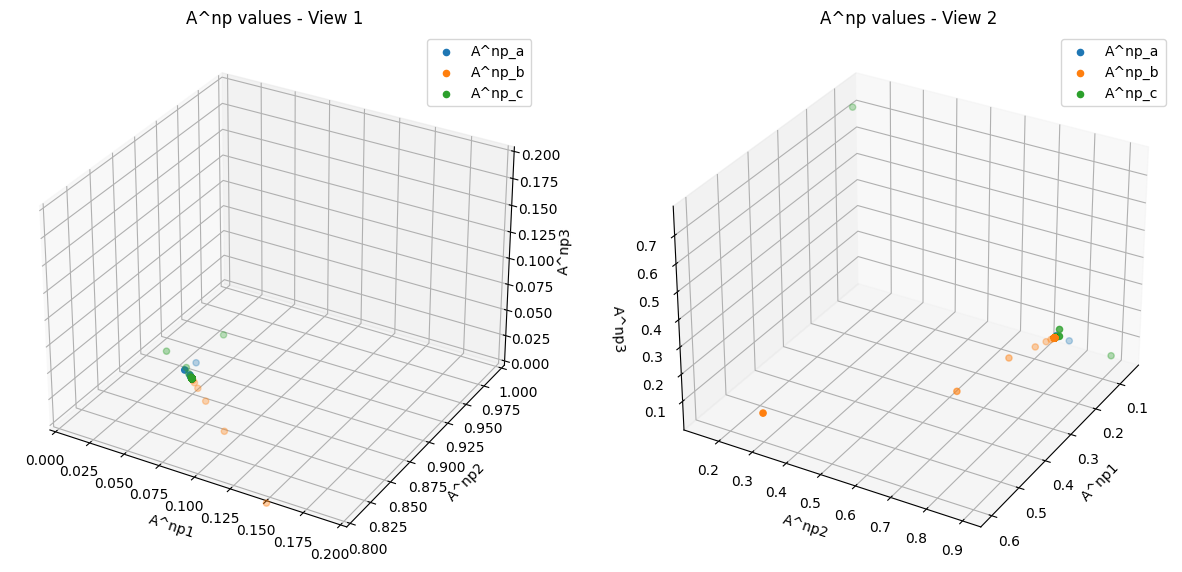

In [9]:

fig = plt.figure(figsize=(15, 7))

ax1 = fig.add_subplot(121, projection='3d')
for i, initial_dist in enumerate(initial_distributions):
    ax1.scatter(A_np_values[i,:,0], A_np_values[i,:,1], A_np_values[i,:,2], label=f'A^np_{chr(97+i)}', color='C'+str(i))
ax1.set_title('A^np values - View 1')
ax1.set_xlabel('A^np1')
ax1.set_ylabel('A^np2')
ax1.set_zlabel('A^np3')
ax1.set_xlim(0, 0.2)
ax1.set_ylim(0.8, 1)
ax1.set_zlim(0, 0.2)
ax1.legend()

ax2 = fig.add_subplot(122, projection='3d')
for i, initial_dist in enumerate(initial_distributions):
    ax2.scatter(A_np_values[i,:,0], A_np_values[i,:,1], A_np_values[i,:,2], label=f'A^np_{chr(97+i)}', color='C'+str(i))
ax2.set_title('A^np values - View 2')
ax2.set_xlabel('A^np1')
ax2.set_ylabel('A^np2')
ax2.set_zlabel('A^np3')
ax2.legend()
ax2.view_init(elev=30, azim=30, )  # Change the viewpoint

plt.show()

## Q20

In [10]:
M = np.r_[A - np.eye(3), [np.ones(3)]]
b = np.r_[np.zeros(3),1].reshape(-1,1)
x, res, rank, s = np.linalg.lstsq(M, b, rcond=None)

In [11]:
x

array([[0.11651486],
       [0.76869541],
       [0.11478974]])